In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
%matplotlib inline
import random
import itertools

In [44]:
weights = []
for _ in range(80):
  weights.append(random.randrange(36, 70))
weight_data = pd.DataFrame({'weight': weights})
weight_data

,weight
0,52
1,47
2,55
3,37
4,37
...,...
75,53
76,60
77,63
78,37


(array([2., 3., 3., 2., 3., 2., 2.]),
 array([38.        , 42.28571429, 46.57142857, 50.85714286, 55.14285714,
        59.42857143, 63.71428571, 68.        ]),
 <BarContainer object of 7 artists>)

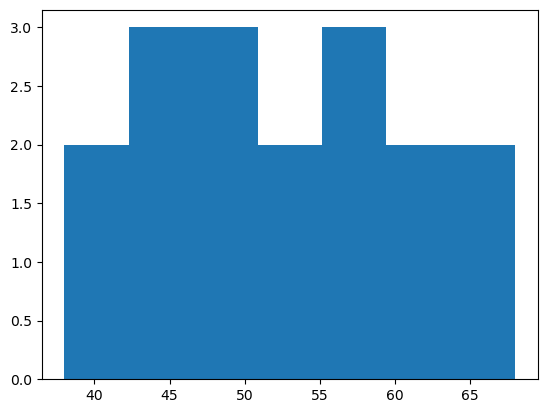

In [99]:
df = pd.DataFrame()
relative_frequencies = []
cumulative_frequencies = []
df['階級'] = pd.Series(['36~40', '41~45', '46~50', '51~55', '56~60', '61~65', '66~70'])
df['階級値'] = pd.Series([38, 43, 48, 53, 58, 63, 68])
df['度数'] = pd.Series([
  weight_data[(weight_data['weight'] >= 36) & (weight_data['weight'] <= 40)]['weight'].count(),
  weight_data[(weight_data['weight'] >= 41) & (weight_data['weight'] <= 45)]['weight'].count(),
  weight_data[(weight_data['weight'] >= 46) & (weight_data['weight'] <= 50)]['weight'].count(),
  weight_data[(weight_data['weight'] >= 51) & (weight_data['weight'] <= 55)]['weight'].count(),
  weight_data[(weight_data['weight'] >= 56) & (weight_data['weight'] <= 60)]['weight'].count(),
  weight_data[(weight_data['weight'] >= 61) & (weight_data['weight'] <= 65)]['weight'].count(),
  weight_data[(weight_data['weight'] >= 66) & (weight_data['weight'] <= 70)]['weight'].count(),
])
df['相対度数'] = df['度数'].apply(lambda x: x / len(weight_data))
for i in range(len(df)):
  result_num = df.iloc[i]['度数']
  for j in range(0, i):
    result_num += df.iloc[j]['度数']
  cumulative_frequencies.append(result_num)
df['累積度数'] = pd.Series(cumulative_frequencies)

plt.hist(df['階級値'], weights=df['度数'], bins=len(df))

In [3]:
df = pd.read_csv('dataset/weight.csv')
df

,階級値,度数,相対度数,階級値x相対度数
0,30,5,NaN,NaN
1,50,10,NaN,NaN
2,70,15,NaN,NaN
3,90,40,NaN,NaN
4,110,20,NaN,NaN
5,130,10,NaN,NaN


In [9]:
total_count = df['度数'].sum()
df['相対度数'] = df['度数'].apply(lambda x: x / total_count)
df['階級値x相対度数'] = df['階級値'] * df['相対度数']
mean = df['階級値x相対度数'].sum()
mean

88.0

In [19]:
df = np.array([6, 4, 6, 6, 6, 3, 7, 2, 2, 8])
mean = df.mean()
deviation = []
for i in range(len(df)):
  deviation.append(df[i] - mean)

decentralization = 0
for i in range(len(deviation)):
  decentralization += (deviation[i] ** 2)

decentralization = decentralization / len(df)
sqrt = np.sqrt(decentralization)
sqrt


2.0